# Tutorial for Dimensionality reduction

# Description

There are many problems that arise when dealing with multi dimensional data. Analysis and arriving at a conclusion becomes very difficult because we cant decide which columns are important and which aren't to drop.
Even though the high dimensionality represents very detailed explanation of the data, we need to reduce the dimensionality to visualise better. This basically is called as the curse of dimensionality.
This is very effective in the case of clustering algorithms that rely on distance calculations


A quora explantion of the complexity of the multi dimensionality of data is very well explained as below:

"Let's say you have a straight line 100 yards long and you dropped a penny somewhere on it. It wouldn't be too hard to find. You walk along the line and it takes two minutes.
Now let's say you have a square 100 yards on each side and you dropped a penny somewhere on it. It would be pretty hard, like searching across two football fields stuck together. It could take days.
Now a cube 100 yards across. That's like searching a 30-story building the size of a football stadium. Ugh.

The difficulty of searching through the space gets a lot harder as you have more dimensions."

There are primarily 2 ways that dimensionality of a problem can be reduced. They are 
1. Feature Selection &
2. Feature Extraction

The difference between the two is that Feature selection selects a feature from the dataset which implies that it creates a subset of the original features. Feature extraction creates a new set of features which are different from the original ones.
The following methods come under feature selection
1. variance thresholds: This method removes features whose values don't change much from observation to observation and remains constant.
2. Correlation Thresholds: This method remains features which are highly correlated features. For example, we have two features like metres and square metres we can remove any one of those feature since we can extract one from the other

The following methods come under feature extraction
1. Principal Component Analysis(PCA): Principal component analysis (PCA) is an unsupervised algorithm that creates linear combinations of the original features. The new features are orthogonal, which means that they are uncorrelated.
2. Linear Discrimination Analysis: It too creates linear combination of the original features. However this method maximises the seperability between the classes.


# Application

In [28]:
import os
os.chdir('/Users/sampathkumar/Downloads/general-practice-prescribing-data')

Tried to apply Dimensionality reduction on my dataset using PCA. 

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
# Load data set
required = pd.read_csv("T201605PDPI+BNFT.csv")
required.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,5668,8092,592,2,44.10,40.84,189
1,1596,17512,16983,2,1.64,1.64,35
2,1596,25587,16124,1,1.26,1.28,42
3,1596,12551,1282,2,0.86,1.02,42
4,1596,18938,10575,1,1.85,1.82,56


Reducing the dimensions of the dataset by dropping the columns which I think are not required in making analysis. 

In [10]:
required2 = required.drop(['bnf_name', 'nic', 'items', 'act_cost'], axis=1)
required2.head()

,practice,bnf_code,quantity
0,5668,8092,189
1,1596,17512,35
2,1596,25587,42
3,1596,12551,42
4,1596,18938,56


The principal components of the selected attributes

In [20]:
X = required2.iloc[:,0:2]
y = required2.iloc[:,2]

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X_std)

In [16]:
print(pca.components_)

[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


In [17]:
reduced_X = pd.DataFrame(reduced_X)
reduced_X.index = reduced_X.index
reduced_X.columns = ['PC1','PC2']
reduced_X.head()

,PC1,PC2
0,-0.581060,0.457571
1,1.167380,0.571037
2,1.868145,-0.129728
3,0.736854,1.001563
4,1.291131,0.447286


Plotting the graph for the first two prinicpal components

<IPython.core.display.Javascript object>


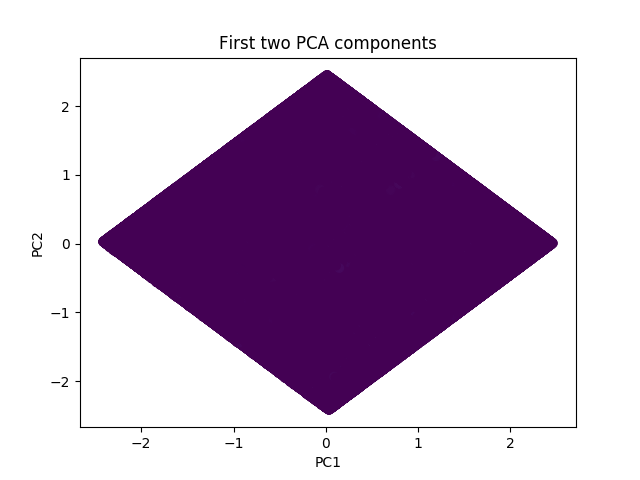

In [23]:
% matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_X.iloc[:, 0], reduced_X.iloc[:, 1], c=y, cmap='viridis')

ax.set_title("First two PCA components")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show()

# Cluster analysis of the Dimensionally reduced Data using K-means Algorithm

In [24]:
from sklearn.cluster import KMeans

km_2 = KMeans(n_clusters=2)
km_2.fit(reduced_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
y_pred2 = km_2.predict(reduced_X)
y_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

Describing the centroids

In [26]:
centers = km_2.cluster_centers_
centers

array([[-0.6295548 , -0.6325697 ],
       [ 0.6068113 ,  0.60971729]])

Plotting the clusteirng graph for the Dimensionally reduced data by PCA

<IPython.core.display.Javascript object>


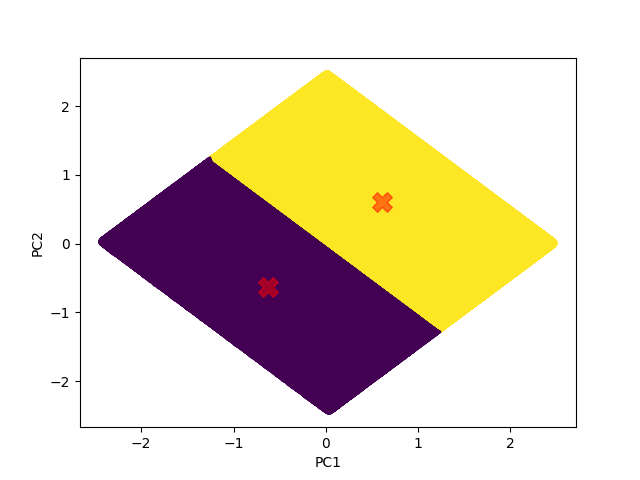

In [27]:
%matplotlib notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(reduced_X.iloc[:, 0], reduced_X.iloc[:, 1], c=y_pred2, cmap='viridis')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.scatter(centers[:, 0], centers[:, 1], c='red', marker = 'X', s=200, alpha=0.5)
plt.show()

References:
    https://elitedatascience.com/dimensionality-reduction-algorithms